In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data = os.listdir('/content/drive/MyDrive/fin_dataset_final')

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from tensorflow.keras import regularizers
from keras.applications.vgg19 import VGG19
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

<ipython-input-4-66ac03789121>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:

data

['fin_dataset', 'vivek dl research paper-1.docx']

In [ ]:
import pathlib
data = '/content/drive/MyDrive/fin_dataset_final/fin_dataset'
data = pathlib.Path(data)
data

PosixPath('/content/drive/MyDrive/fin_dataset_final/fin_dataset')

In [ ]:


dataset_dict={
    'Aeroplane':list(data.glob('Aeroplane/*')),
    'Missile':list(data.glob('Missile/*')),
    'Bird':list(data.glob('Birds_final/*')),
    'Helicopter':list(data.glob('Helicopter/*')),
    'Drone':list(data.glob('Drones_final/*')),
}

print(len(dataset_dict['Aeroplane']))
print(len(dataset_dict['Missile']))
print(len(dataset_dict['Bird']))
print(len(dataset_dict['Helicopter']))
print(len(dataset_dict['Drone']))

429
403
504
526
481


In [ ]:
dataset_labels={
    'Aeroplane': 0,
    'Missile': 1,
    'Bird': 2,
    'Helicopter': 3,
    'Drone': 4,
}

In [ ]:
X, y= [], []
for object_name, images in dataset_dict.items():
  for image in tqdm(images):
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(dataset_labels[object_name])

  0%|          | 0/429 [00:00<?, ?it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/526 [00:00<?, ?it/s]

  0%|          | 0/481 [00:00<?, ?it/s]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))

1874
469


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
#The above output are the sizes of lists before augmentation
#Now we will perform data augmentation to increase the no of samples and better training
data_augmentation = keras.Sequential([
   layers.experimental.preprocessing.RandomRotation(0.1),
   layers.experimental.preprocessing.RandomContrast(0.1),
   layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
model = Sequential()

model.add(data_augmentation)

# Stage 1
model.add(layers.Conv2D(input_shape = (224, 224, 3), filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 2
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 3
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 4
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 5
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.Conv2D(filters = 512, kernel_size = (3, 3), strides=(1, 1), activation = 'relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


# Stage 6
model.add(layers.Flatten())
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 4096, activation='relu'))
model.add(layers.Dense(units = 5, activation='softmax'))

model.compile(optimizer="sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# history = model.load_weights('/content/drive/MyDrive/vgg19net.h5')
history = model.fit(X_train_scaled, y_train, epochs=50,validation_data = (X_test_scaled,y_test),batch_size = 8)

Epoch 1/50
235/235 [==============================] - 68s 211ms/step - loss: 1.6067 - accuracy: 0.2182 - val_loss: 1.6101 - val_accuracy: 0.1834
Epoch 2/50
235/235 [==============================] - 49s 210ms/step - loss: 1.6042 - accuracy: 0.2236 - val_loss: 1.6081 - val_accuracy: 0.1940
Epoch 3/50
235/235 [==============================] - 49s 209ms/step - loss: 1.6031 - accuracy: 0.2311 - val_loss: 1.6093 - val_accuracy: 0.1834
Epoch 4/50
235/235 [==============================] - 49s 210ms/step - loss: 1.5996 - accuracy: 0.2567 - val_loss: 1.6007 - val_accuracy: 0.2047
Epoch 5/50
235/235 [==============================] - 48s 203ms/step - loss: 1.5829 - accuracy: 0.2898 - val_loss: 1.6239 - val_accuracy: 0.1834
Epoch 6/50
235/235 [==============================] - 48s 203ms/step - loss: 1.5980 - accuracy: 0.2369 - val_loss: 1.6084 - val_accuracy: 0.2537
Epoch 7/50
235/235 [==============================] - 48s 203ms/step - loss: 1.6044 - accuracy: 0.2156 - val_loss: 1.6085 - val_ac

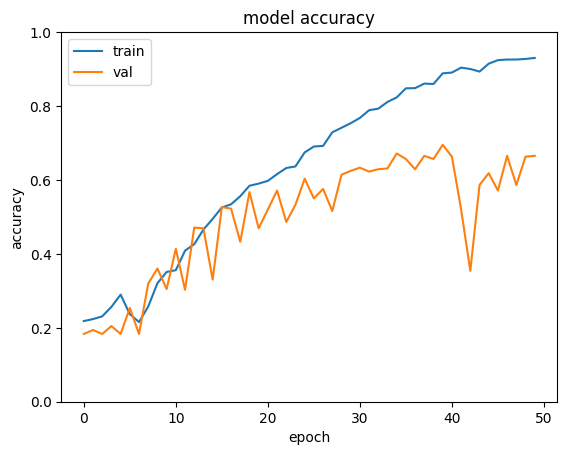

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()
model.save_weights('/content/drive/MyDrive/vgg19net.h5')

In [ ]:
# history = model.load_weights('/content/drive/MyDrive/vgg19net.h5')

In [ ]:
model.evaluate(X_test_scaled,y_test)

15/15 [==============================] - 10s 372ms/step - loss: 1.5344 - accuracy: 0.6652


[1.5344289541244507, 0.6652451753616333]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                      

In [ ]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(classification_report(y_test,predictions))

15/15 [==============================] - 2s 143ms/step
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        80
           1       0.65      0.62      0.64        93
           2       0.63      0.53      0.58        86
           3       0.71      0.78      0.74       119
           4       0.62      0.68      0.65        91

    accuracy                           0.67       469
   macro avg       0.66      0.66      0.66       469
weighted avg       0.66      0.67      0.66       469



15/15 [==============================] - 2s 145ms/step


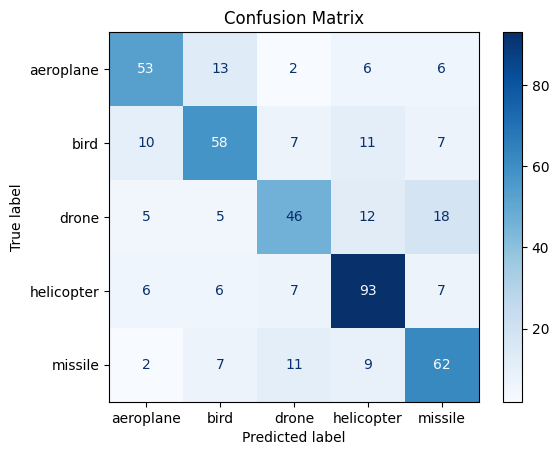

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert model predictions to class labels (integer values)
predictions = np.argmax(model.predict(X_test_scaled), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Define class labels for your specific case
class_labels = ["aeroplane","bird","drone","helicopter","missile"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

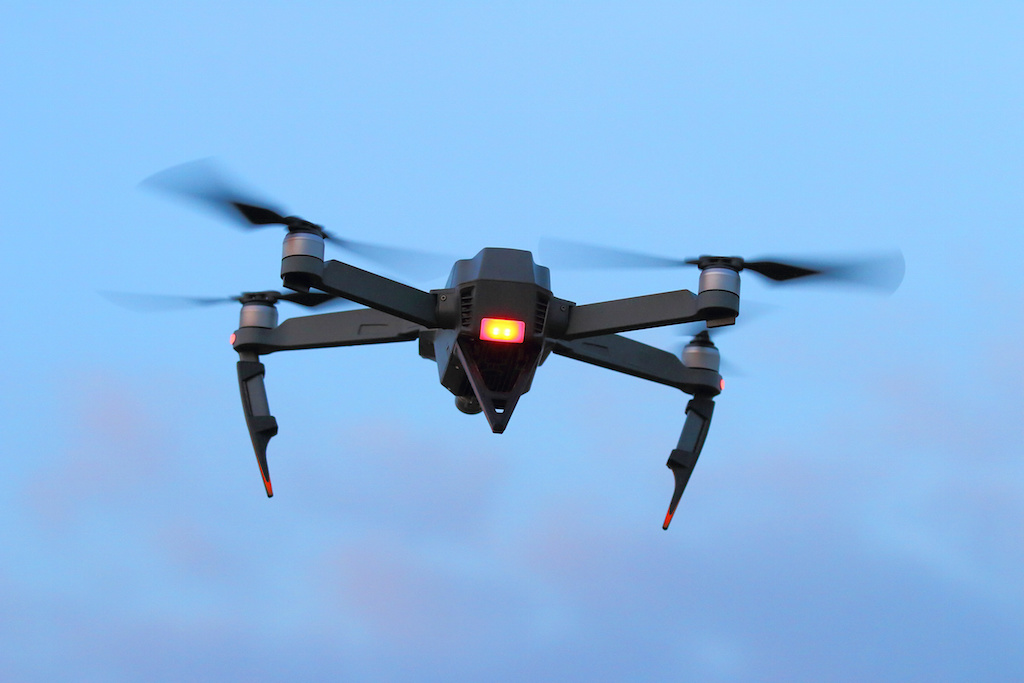

In [ ]:
image_shape=(224,224)
test_image = PIL.Image.open('/content/drive/MyDrive/fin_dataset_final/fin_dataset/Drones_final/0009.jpg')
test_image

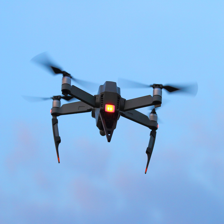

In [ ]:
test = PIL.Image.open('/content/drive/MyDrive/fin_dataset_final/fin_dataset/Drones_final/0009.jpg').resize(image_shape)
test

In [ ]:
test = np.array(test)/255.0
test.shape

(224, 224, 3)

In [ ]:
test[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
model.predict(test[np.newaxis,...])

1/1 [==============================] - 1s 572ms/step


array([[9.2003830e-03, 5.0912746e-05, 1.8370184e-03, 2.1539575e-03,
        9.8675770e-01]], dtype=float32)

In [ ]:
result=model.predict(test[np.newaxis,...])

1/1 [==============================] - 0s 31ms/step


In [ ]:
if(np.argmax(result)==0):
  print('aeroplane')
elif(np.argmax(result)==1):
  print('Missile')
elif(np.argmax(result)==2):
  print('Bird')
elif(np.argmax(result)==3):
  print('Helicopter')
elif(np.argmax(result)==4):
  print('Drone')

Drone


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/My Folder"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 model.save('/content/drive/My Drive/My Folder/model_{}.h5'.format(50))

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/My Folder/model_50.h5')

In [ ]:
model.predict(test[np.newaxis,...])

1/1 [==============================] - 2s 2s/step


array([[9.2003830e-03, 5.0912746e-05, 1.8370184e-03, 2.1539575e-03,
        9.8675770e-01]], dtype=float32)